# CUESTIONARIO EVALUACIÓN 19/12/2023

In [18]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_breast_cancer, make_circles, make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import imdb, mnist, reuters
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Rescaling
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import load_model

# Pregunta 1 (3 puntos)
## En este ejercicio se proporciona el conjunto de datos de entrenamiento datos_entrenamiento_ssii.csv sobre el cual ya se han aplicado todas las fases de preprocesamiento necesarias. Utiliza este conjunto de datos para entrenar modelos usando el algoritmo de los vecinos de cercanos probando distintas combinaciones de números de vecinos y distancias. En concreto, prueba todas las posibles combinaciones formadas con los números de vecinos 3, 7, y 11 y las distancias Manhattan y Euclídea. Para cada combinación de parámetros utiliza GridSearchCV para obtener los resultados de la accuracy en validación cruzada empleando 10 cajas. Observa los resultados del modelo entrenado con 3 vecinos y la distancia Manhattan: ¿Cuál es el valor de la accuracy obtenida al validar el modelo utilizando la caja con id 8 y el resto de cajas para entrenar?

In [16]:
df = pd.read_csv('datos_entrenamiento_ssii.csv')

X = df.drop('Clase', axis = 1)
y = df['Clase']

param_grid = {
    'n_neighbors': [3],
    'p': [1]
}

model = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X, y.values.ravel())

print(grid_search.cv_results_)

{'mean_fit_time': array([0.00287445]), 'std_fit_time': array([0.00274287]), 'mean_score_time': array([0.02490363]), 'std_score_time': array([0.03930952]), 'param_n_neighbors': masked_array(data=[3],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_p': masked_array(data=[1],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 3, 'p': 1}], 'split0_test_score': array([0.84615385]), 'split1_test_score': array([0.69230769]), 'split2_test_score': array([0.61538462]), 'split3_test_score': array([0.84615385]), 'split4_test_score': array([0.76923077]), 'split5_test_score': array([0.91666667]), 'split6_test_score': array([1.]), 'split7_test_score': array([0.91666667]), 'split8_test_score': array([0.91666667]), 'split9_test_score': array([0.91666667]), 'mean_test_score': array([0.84358974]), 'std_test_score': array([0.11239722]), 'rank_test_score': array([1], dtype=int32)}


a. 0.92 

# Pregunta 2 (2 puntos)

## Considera la siguiente salida de código. Realiza una comparación de los dos modelos obtenidos contestando cuestiones como por ejemplo ¿hay sobreajuste en alguno de ellos?, ¿qué impacto tiene la poda?, ¿sería necesario podar más?, ¿elegirías algún parámetro más, y en caso afirmativo qué otros parámetros y por qué?
```
## 
## ÁRBOL SIN PODA

## Accuracy train sin poda: 1.00

## Accuracy validación cruzada sin poda (media = 0.91)

## [0.88 0.96 0.88 0.92 0.92]

## Accuracy test sin poda: 0.91

## 
## ÁRBOL CON PODA

## Parámetros del árbol (elegidos {'max_depth': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0})

## Accuracy train con poda: 0.97

## Accuracy validación cruzada con poda (media = 0.92)

## [0.88, 0.96, 0.92, 0.92, 0.92]

## Accuracy test con poda: 0.91

## 
## Árboles resultantes

## 
## ÁRBOL SIN PODA

## |--- 3 <= 0.16
## |   |--- 18 <= -1.42
## |   |   |--- 3 <= -0.88
## |   |   |   |--- class: 0
## |   |   |--- 3 >  -0.88
## |   |   |   |--- class: 1
## |   |--- 18 >  -1.42
## |   |   |--- 19 <= -2.32
## |   |   |   |--- class: 1
## |   |   |--- 19 >  -2.32
## |   |   |   |--- 6 <= 0.99
## |   |   |   |   |--- class: 0
## |   |   |   |--- 6 >  0.99
## |   |   |   |   |--- 13 <= -0.68
## |   |   |   |   |   |--- class: 1
## |   |   |   |   |--- 13 >  -0.68
## |   |   |   |   |   |--- class: 0
## |--- 3 >  0.16
## |   |--- 7 <= 1.97
## |   |   |--- class: 1
## |   |--- 7 >  1.97
## |   |   |--- class: 0

## 
## ÁRBOL CON PODA

## |--- 3 <= 0.16
## |   |--- 18 <= -1.42
## |   |   |--- class: 1
## |   |--- 18 >  -1.42
## |   |   |--- 19 <= -2.32
## |   |   |   |--- class: 1
## |   |   |--- 19 >  -2.32
## |   |   |   |--- class: 0
## |--- 3 >  0.16
## |   |--- 4 <= 2.14
## |   |   |--- class: 1
## |   |--- 4 >  2.14
## |   |   |--- class: 0
```

## ¿Hay sobreajuste en alguno de ellos?

Ambos modelos presentan sobreajuste, siendo el primero (árbol sin poda), el que más sobreajuste presenta, esto se puede observar al comprobar como la accuracy en el conjunto de entrenamiento es superior a la obtenida en el conjunto de validación.

> Accuracy train sin poda: 1.00 > Accuracy test sin poda: 0.91
> Accuracy train con poda: 0.97 > Accuracy test con poda: 0.91

## ¿Qué impacto tiene la poda?

Generaliza más el árbol, reduciendo su profundidad. Cabe mencionar, que también reduce el sobreajuste tal y como se ha comentado antes, algo que se puede ver en la accuracy de entrenamiento y en la de validación cruzada.

> Accuracy train sin poda: 1.00 > Accuracy train con poda: 0.97
> Accuracy validación cruzada sin poda (media = 0.91) < Accuracy validación cruzada con poda (media = 0.92)

## ¿Sería necesario podar más?

No, para obtener mejores resultados sería recomendable probar otras técnicas, ya que al podar más resultaría en un descenso de la accuracy.

## ¿Elegirías algún parámetro más, y en caso afirmativo qué otros parámetros y por qué?

Sí, añadiría los siguientes parámetros y probaría con diferentes valores:

* ccp_alpha.
* min_samples_leaf.
* criterion.
* max_leaf_nodes.

Con estos parámetros y las respectivas variaciones de valores, se buscaría reducir el sobreajuste ya producido.

# Pregunta 3 (2 puntos)
## En este ejercicio se proporciona un conjunto de datos definidos por variables numéricas ya divido en un conjunto de entrenamiento datos_entrenamiento_ssii_train.csv y otro de test datos_entrenamiento_ssii_test.csv. Estos datos contienen valores faltantes. Imputa los valores faltantes usando la estrategia median. ¿Cuál es el valor imputado en el conjunto de test en la fila con índice 5 y la columna con índice 3?
#### NOTA: El resultado está redondeado a cuatro decimales.

In [20]:
df_train = pd.read_csv('datos_entrenamiento_ssii_train.csv') 
df_test = pd.read_csv('datos_entrenamiento_ssii_test.csv')
imp = SimpleImputer(strategy='median') 
impX = imp.fit_transform(df_train) 
impY = imp.transform(df_test)
print(impY[5][3])

-0.2863875867089193


b. -0.2864 

# Pregunta 4 (1 punto)
## Estamos entrenando con un conjunto de imágenes de 28 píxeles de alto y 28 píxeles de ancho. Nuestro modelo tiene una única capa de convolución (además del Input) como la siguiente:

### Conv2D(filters=32, kernel_size=3, activation="relu")

## La dimensión de salida pasa a ser 26x26, sin embargo, nos interesa que esta se mantenga en 28x28. ¿Qué podemos hacer?

#### NOTA: Puede haber más de una respuesta correcta.

In [10]:
model_cnn2 = Sequential()
model_cnn2.add(Input(shape=(28, 28, 1)))
#model_cnn2.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model_cnn2.add(Conv2D(filters=32, kernel_size=1, activation="relu"))
#model_cnn2.add(Conv2D(filters=32,kernel_size=3,activation="relu",strides=(2,2)))
#model_cnn2.add(MaxPooling2D(pool_size=2))
#model_cnn2.add(Conv2D(filters=32,kernel_size=5,activation="relu"))
model_cnn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


a. Modificar la capa para que use estos argumentos: Conv2D(filters=32, kernel_size=1, activation="relu") 

# Pregunta 5 (2 puntos)
## Realiza una comparación de las salidas obtenidas por estos tres modelos de redes neuronales ¿detectas algún comportamiento llamativo?, ¿qué modelo elegirías?
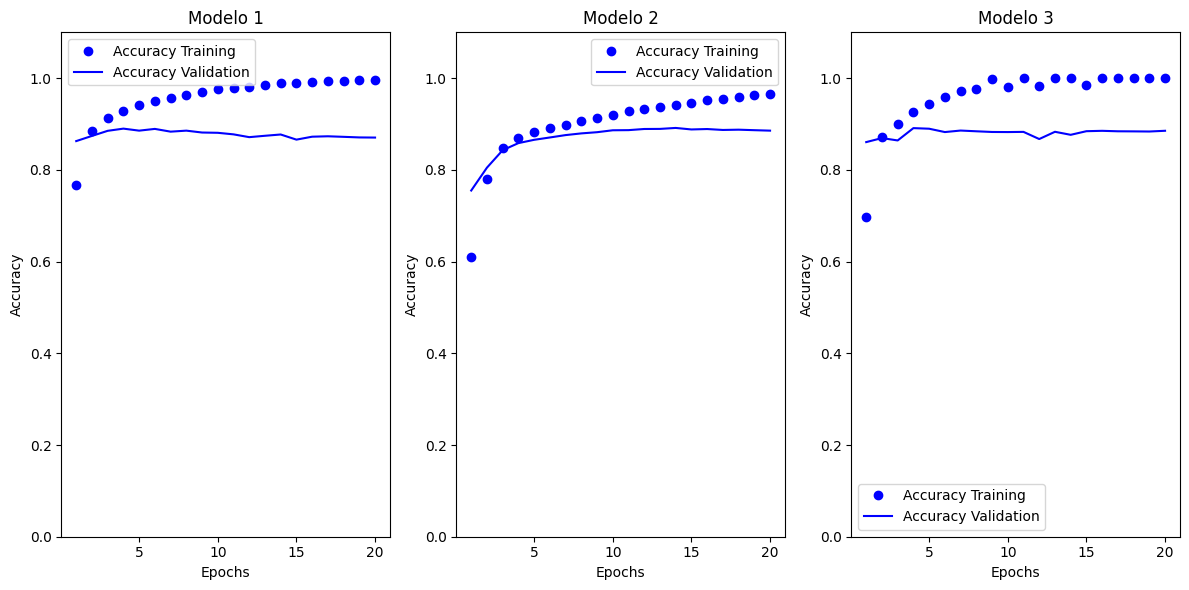

## ¿Detectas algún comportamiento llamativo?

Con respecto al primer modelo, se puede observar que la accuracy para el conjunto de datos de entrenamiento es 1, pero no converge para el conjunto de validación, indicando así que el modelo está experimentando un sobreajuste.

En cambio, pasando al segundo modelo, la accuracy no alcanza el 1 en los datos de entrenamiento, y sí que se aprecia una convergencia para el conjunto de datos de validación.

Por último, con respecto al tercer modelo, la accuracy es 1 en el conjunto de datos de entrenamiento, pero no converge en el conjunto de validación, de esta forma, se puede concluir que también experimenta un sobreajuste.

## ¿Qué modelo elegirías?

En base a lo que se ha mencionado en la pregunta anterior, elegiría el segundo modelo, ya que presenta una mayor probabilidad de obtener mejores resultados para un conjunto de datos distinto al de entrenamiento, al ser el único que no presenta sobreajuste.

